<a href="https://colab.research.google.com/github/mark-nick-o/AIML_SoundArtsProject/blob/main/Copy%20of%20style_transfer_demo_saai_factory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fast Neural Style Transfer Demo

This style transfer inference demo is based on Logan Engstrom's work (https://github.com/lengstrom/fast-style-transfer). This demo was arranged by Isha Khurram (isha.khurram@mail.utoronto.ca) under the supervision of Professor Mohamed Elhoseiny (mohamed.elhoseiny@kaust.edu.sa) from King Abdullah University of Science and Technology for the SAAI Factory International Symposium (https://saai.devpost.com/).


In [1]:
!git clone https://github.com/lengstrom/fast-style-transfer.git

Cloning into 'fast-style-transfer'...
remote: Enumerating objects: 245, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 245 (delta 1), reused 1 (delta 0), pack-reused 238
Receiving objects: 100% (245/245), 11.02 MiB | 33.39 MiB/s, done.
Resolving deltas: 100% (112/112), done.


In [2]:
!pip install moviepy==1.0.2

     |████████████████████████████████| 7.8 MB 1.5 MB/s 
     |████████████████████████████████| 3.3 MB 41.1 MB/s 
     |████████████████████████████████| 26.9 MB 84 kB/s 
  Created wheel for moviepy: filename=moviepy-1.0.2-py3-none-any.whl size=110744 sha256=233de314dee13660b741315dcfa21d6df24699f8237d66a86de04f2af3507eec
  Stored in directory: /root/.cache/pip/wheels/f0/36/f2/32c37d2b7a4f04622ccec875f71ebf5f33f892cea410f26454
  Created wheel for proglog: filename=proglog-0.1.9-py3-none-any.whl size=6156 sha256=14f680eba322c5d1eaddd3f87997651864af0bc3c5390fd98998d7bc9f66c61a
  Stored in directory: /root/.cache/pip/wheels/12/36/1f/dc61e6ac10781d63cf6fa045eb09fa613a667384e12cb6e6e0
Successfully built moviepy proglog
  Attempting uninstall: imageio
    Found existing installation: imageio 2.4.1
    Uninstalling imageio-2.4.1:
      Successfully uninstalled imageio-2.4.1
  Attempting uninstall: moviepy
    Found existing installation: moviepy 0.2.3.5
    Uninstalling moviepy-0.2.3.5:
    

In [3]:
%cd fast-style-transfer/

/content/fast-style-transfer


In [4]:
%mkdir -p data/bin mydata/train checkpoint output

# Upload:
1.   The trained network (i.e., the different styles) to the checkpoint folder. You can access the trained network here: https://drive.google.com/drive/folders/0B9jhaT37ydSyRk9UX0wwX3BpMzQ?resourcekey=0-Z9LcNHC-BTB4feKwm4loXw&usp=sharing
2.   Your sample photos to mydata/train folder. You can access some sample photos here: https://drive.google.com/drive/folders/1nGAI6RFetqnQWvZaqKRJFiFvWqBhzThz?usp=sharing


In [5]:
import sys
sys.path.insert(0, '/content/fast-style-transfer')

In [6]:
import os
from pathlib import Path
from evaluate import ffwd_to_img

In [7]:
class dummy():
   pass
opts = dummy()

# Specify the name of the: 
1.  Image file (first line)
**For example**: 
*  opts.in_path = "./mydata/train/human.jpg"
*  opts.in_path = "./mydata/train/cat.png"

2.  Trained network (third line)
**For example**: 
*  opts.checkpoint_dir = "./checkpoint/udnie.ckpt"
*  opts.checkpoint_dir = "./checkpoint/wreck.ckpt"


In [14]:
#opts.in_path = "./mydata/train/beacon.jpg"
opts.in_path = "./mydata/train/gann1.JPG"
opts.out_path = "./output"
#opts.checkpoint_dir = "./checkpoint/wreck.ckpt"
opts.checkpoint_dir = "./checkpoint/la_muse.ckpt"

In [15]:
opts.batch_size = 4
opts.device = '/gpu:0'

In [16]:
def main():

    if not os.path.isdir(opts.in_path):
        if os.path.exists(opts.out_path) and os.path.isdir(opts.out_path):
            out_path = \
                    os.path.join(opts.out_path,os.path.basename(opts.in_path))
        else:
            out_path = opts.out_path

        ffwd_to_img(opts.in_path, out_path, opts.checkpoint_dir,
                    device=opts.device)
    else:
        files = list_files(opts.in_path)
        full_in = [os.path.join(opts.in_path,x) for x in files]
        full_out = [os.path.join(opts.out_path,x) for x in files]
        if opts.allow_different_dimensions:
            ffwd_different_dimensions(full_in, full_out, opts.checkpoint_dir, 
                    device_t=opts.device, batch_size=opts.batch_size)
        else :
            ffwd(full_in, full_out, opts.checkpoint_dir, device_t=opts.device,
                    batch_size=opts.batch_size)

In [17]:
%cd /content/fast-style-transfer/
main()

/content/fast-style-transfer
INFO:tensorflow:Restoring parameters from ./checkpoint/la_muse.ckpt


#View the original image below!

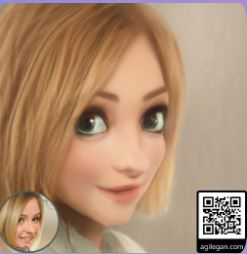

In [18]:
from PIL import Image
Image.open(f'/content/fast-style-transfer/mydata/train/{Path(opts.in_path).name}')

#View the output image below!

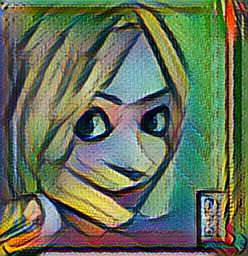

In [19]:
 from PIL import Image
Image.open(f'/content/fast-style-transfer/output/{Path(opts.in_path).name}')